# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [41]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [42]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [43]:
#pyber_data_df.tail(12)

In [44]:
# 2. Get the total drivers for each city type
#pyber_data_df.groupby(["type"])
#total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]

#total_drivers




## Deliverable 1: Get a Summary DataFrame 

In [45]:
#  1. Get the total rides for each city type
pyber_data_df.groupby(["type"])
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [46]:
# 2. Get the total drivers for each city type
# Group our data based upon 'bikeid' and 'gender'
#bike_groups = clean_bike_trips_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
#sum_it_up = bike_groups.sum()
#sum_it_up.head(12)

drivers_type = city_data_df.groupby(["type"])
total_drivers = drivers_type.sum()["driver_count"]

total_drivers




type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [47]:
#  3. Get the total amount of fares for each city type

pyber_data_df.groupby(["type"])
sum_of_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_of_fare



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [48]:
#  4. Get the average fare per ride for each city type. 
avarage_fare_per_ride = sum_of_fare / total_rides
avarage_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [49]:
# 5. Get the average fare per driver for each city type. 
avarage_fare_per_driver = sum_of_fare / total_drivers
avarage_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [50]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame()


pyber_summary_df["Total Rides"] = total_rides
pyber_summary_df["Total Drivers"] = total_drivers
pyber_summary_df["Total Fares"] = sum_of_fare
pyber_summary_df["Avarage Fare per Ride"] = avarage_fare_per_ride
pyber_summary_df["Avarage fare per Driver"] = avarage_fare_per_driver
# Print the DataFrame.

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Avarage Fare per Ride,Avarage fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [51]:
#  7. Cleaning up the DataFrame. Delete the index name

pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avarage Fare per Ride,Avarage fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_summary_df = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
fare_summary_df.head()





date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
Name: fare, dtype: float64

In [15]:
fare_summary_df.tail(14)

date                 type    
2019-05-07 15:34:59  Suburban    44.87
2019-05-07 17:27:48  Urban        6.39
2019-05-07 19:22:15  Rural       44.94
2019-05-07 19:45:40  Suburban    26.11
2019-05-07 20:05:15  Urban       24.20
2019-05-07 20:22:19  Urban       18.74
2019-05-07 20:40:29  Suburban    24.89
2019-05-08 01:54:18  Urban       32.69
2019-05-08 02:31:25  Urban       41.33
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, dtype: float64

In [16]:
#pyber_data_df.groupby (["type"])
#sum_fare_2 = pyber_data_df.groupby(["type", "Date"]).sum()[["fare"]]



#sum_fare_2.head()

In [17]:
#fare_summary_df = pd.DataFrame({
   # "Type": sum_fare_2,
    #"Date": sum_fare_1})
#fare_summary_df

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_summary_df = fare_summary_df.reset_index()
fare_summary_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_summary_df_pivot = fare_summary_df.pivot(index="date", columns="type", values="fare")
fare_summary_df.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


In [20]:
fare_summary_df.tail(5)

,date,type,fare
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77
2374,2019-05-08 13:10:18,Urban,18.04


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_summary_Jan_April = fare_summary_df_pivot.loc['2019-01-01':'2019-04-29']

In [22]:
#fare_summary_Jan_April.head()

In [23]:
fare_summary_Jan_April.tail(5)

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [24]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_summary_Jan_April.index = pd.to_datetime(fare_summary_Jan_April.index)

In [25]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_summary_Jan_April.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [26]:
#fare_summary_Jan_April.head()

In [27]:
fare_summary_Jan_April.tail(5)

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [28]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_each_week_df = fare_summary_Jan_April.resample('W').sum()
fares_each_week_df.head
fares_each_week_df.tail(10)
fares_each_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


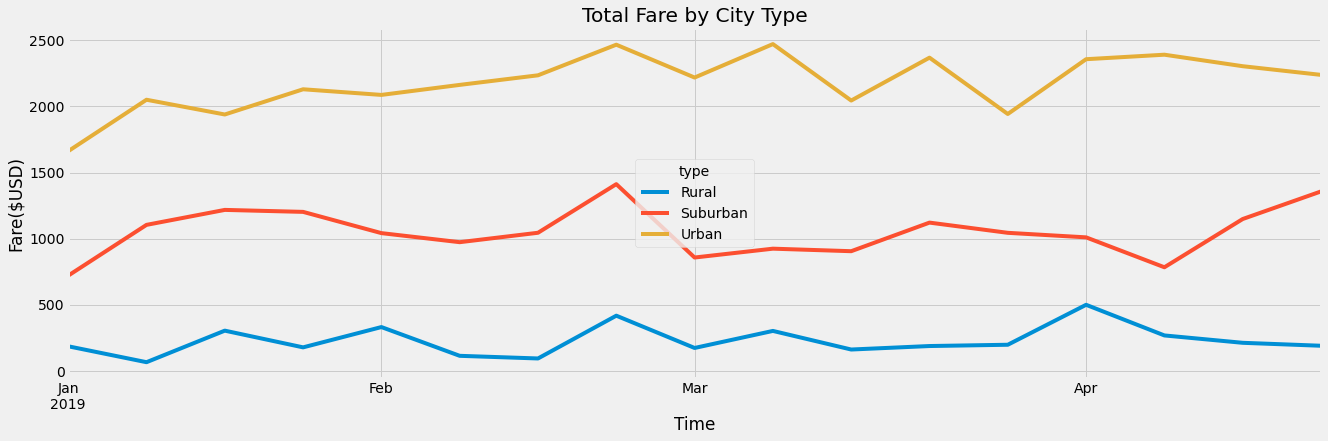

<Figure size 432x288 with 0 Axes>

In [29]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fares_each_week = fares_each_week_df.plot(figsize = (20,6))
# Add a title 
fares_each_week.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
fares_each_week.set_xlabel("Time")
fares_each_week.set_ylabel("Fare($USD)")

plt.show()
plt.tight_layout()

